Dataset: https://drive.google.com/file/d/1FYYukOwWxsxjz2diESpgYyIfWMLeuoRm/view?usp=sharing

In [ ]:
# Jalankan ini di cell baru:
!pip install numpy==1.24.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
blosc2 3.4.0 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.24.3 which is inco

In [ ]:
# Install required packages
!pip install fasttext
!pip install plotly
!pip install wordcloud
!pip install seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import os
import time
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from collections import Counter
import fasttext

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Dependencies installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313511 sha256=2a351cd2cff6b73c6e5f13326066401b5c22d8bd0454c4ae6c5e7ab2ce52e47b
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext
✅ Dependencies installed successfully!


In [ ]:
# ===================================================================
# SECTION 1: Data Loading (MODIFIED untuk Sentiment Analysis)
# ===================================================================

print("\n1. Data Loading untuk Sentiment Analysis...")

# Upload the YouTube Comments Sentiment Dataset
print("Please upload YoutubeCommentsDataSet.csv")
uploaded = files.upload()

# Load the sentiment dataset
df = None
for filename in uploaded.keys():
    if 'csv' in filename.lower():
        df = pd.read_csv(filename)
        print(f"✓ Loaded {filename}: {df.shape}")
        break

if df is None:
    print("❌ No CSV file found!")
    raise FileNotFoundError("Please upload YoutubeCommentsDataSet.csv")

# Check dataset structure
print(f"\n📊 Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")

# Check for missing values
print(f"\n🔍 Missing Values:")
print(df.isnull().sum())

# Basic info about sentiment distribution
if 'Sentiment' in df.columns:
    sentiment_counts = df['Sentiment'].value_counts()
    print(f"\n📈 Sentiment Distribution:")
    for sentiment, count in sentiment_counts.items():
        percentage = (count / len(df)) * 100
        print(f"{sentiment}: {count} ({percentage:.1f}%)")
else:
    print("❌ 'Sentiment' column not found!")

print("✅ Data loading completed!")


1. Data Loading untuk Sentiment Analysis...
Please upload YoutubeCommentsDataSet.csv


Saving YoutubeCommentsDataSet.csv to YoutubeCommentsDataSet.csv
✓ Loaded YoutubeCommentsDataSet.csv: (18408, 2)

📊 Dataset Information:
Shape: (18408, 2)
Columns: ['Comment', 'Sentiment']
Data types:
Comment      object
Sentiment    object
dtype: object

🔍 Missing Values:
Comment      44
Sentiment     0
dtype: int64

📈 Sentiment Distribution:
positive: 11432 (62.1%)
neutral: 4638 (25.2%)
negative: 2338 (12.7%)
✅ Data loading completed!



2. Exploratory Data Analysis...


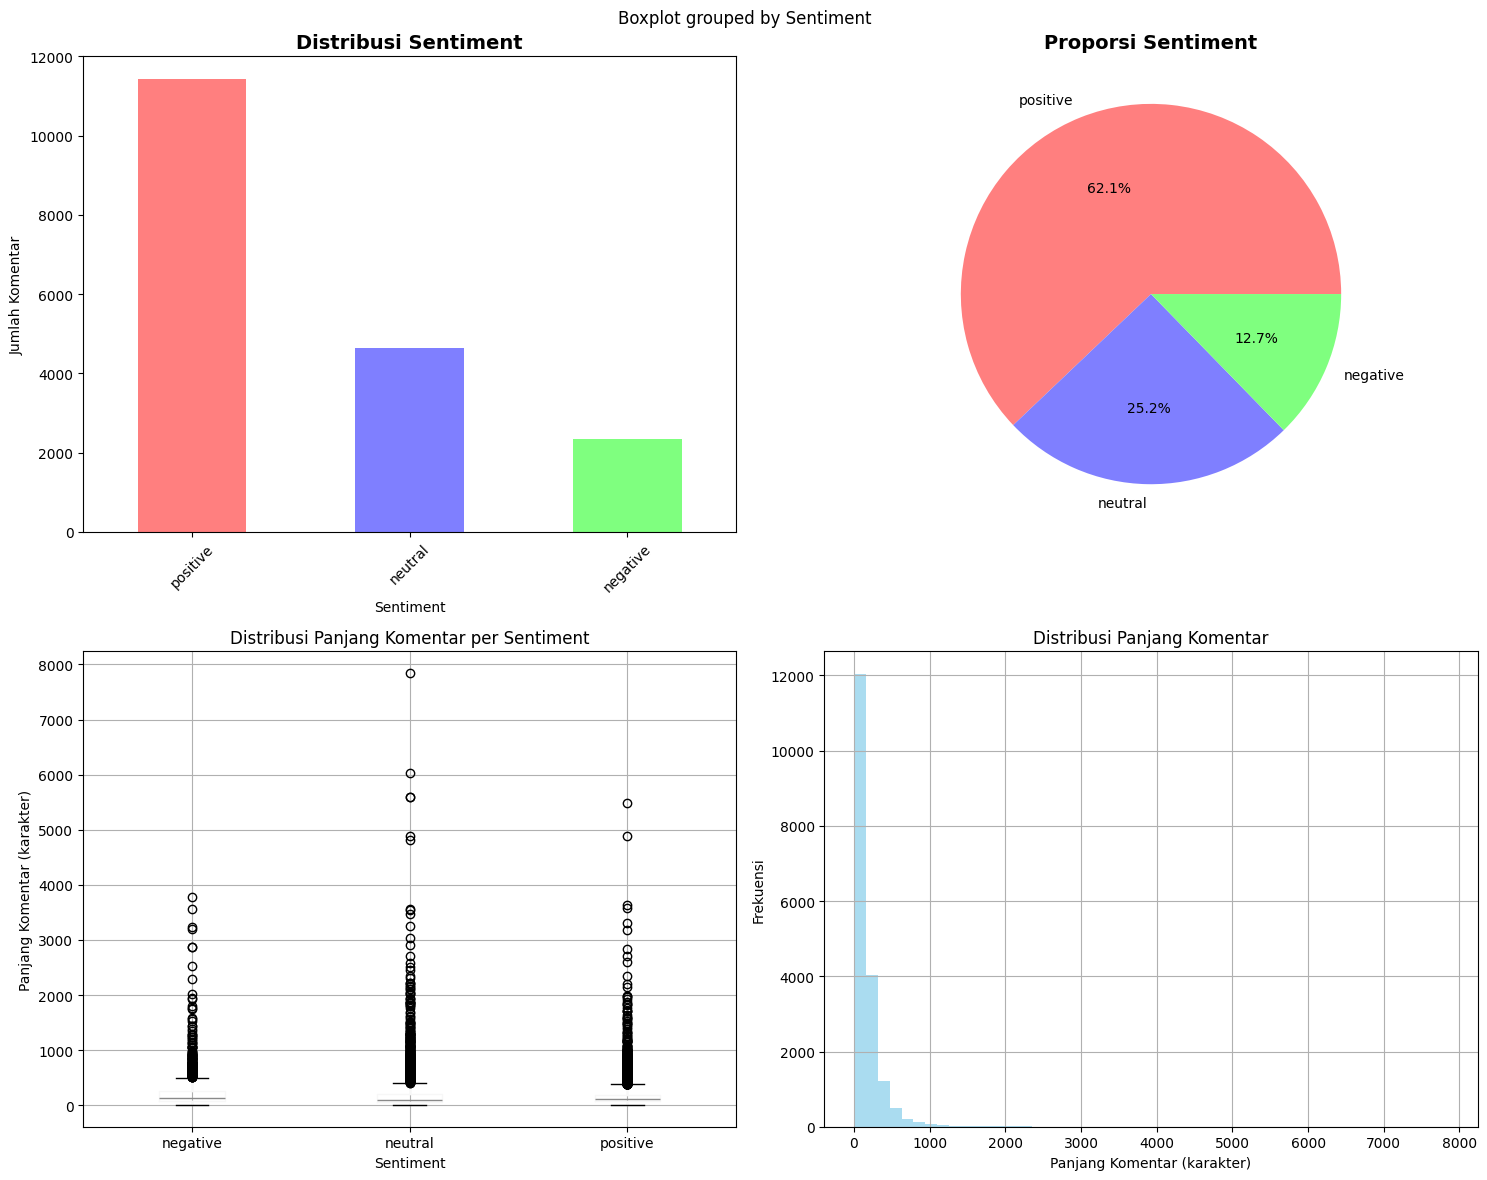


📏 Statistik Panjang Komentar:
             count        mean         std  min   25%    50%    75%     max
Sentiment                                                                  
negative    2337.0  213.155327  271.558672  4.0  79.0  134.0  250.0  3775.0
neutral     4625.0  196.850811  348.892464  2.0  58.0   99.0  199.0  7847.0
positive   11402.0  162.429837  190.772111  3.0  68.0  114.0  194.0  5487.0
✅ EDA completed!


In [ ]:
# ===================================================================
# SECTION 2: Exploratory Data Analysis
# ===================================================================

print("\n2. Exploratory Data Analysis...")

# Visualize sentiment distribution
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Bar plot
sentiment_counts.plot(kind='bar', ax=ax1, color=['#ff7f7f', '#7f7fff', '#7fff7f'])
ax1.set_title('Distribusi Sentiment', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Jumlah Komentar')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
ax2.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['#ff7f7f', '#7f7fff', '#7fff7f'])
ax2.set_title('Proporsi Sentiment', fontsize=14, fontweight='bold')

# Comment length analysis
df['comment_length'] = df['Comment'].str.len()
df.boxplot(column='comment_length', by='Sentiment', ax=ax3)
ax3.set_title('Distribusi Panjang Komentar per Sentiment')
ax3.set_xlabel('Sentiment')
ax3.set_ylabel('Panjang Komentar (karakter)')

# Histogram of comment lengths
df['comment_length'].hist(bins=50, ax=ax4, alpha=0.7, color='skyblue')
ax4.set_title('Distribusi Panjang Komentar')
ax4.set_xlabel('Panjang Komentar (karakter)')
ax4.set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Comment length statistics
print(f"\n📏 Statistik Panjang Komentar:")
length_stats = df.groupby('Sentiment')['comment_length'].describe()
print(length_stats)

print("✅ EDA completed!")

In [ ]:
# ===================================================================
# SECTION 3: Text Preprocessing (OPTIMIZED untuk Sentiment)
# ===================================================================

print("\n3. Text Preprocessing...")

class SentimentTextPreprocessor:
    """Text preprocessor optimized for sentiment analysis"""

    def __init__(self):
        self.contractions = {
            "don't": "do not", "won't": "will not", "can't": "cannot",
            "n't": " not", "'re": " are", "'ve": " have", "'ll": " will",
            "'d": " would", "'m": " am", "it's": "it is", "that's": "that is",
            "what's": "what is", "where's": "where is", "how's": "how is",
            "who's": "who is", "there's": "there is"
        }

    def expand_contractions(self, text):
        """Expand contractions in text"""
        for contraction, expansion in self.contractions.items():
            text = text.replace(contraction, expansion)
        return text

    def remove_urls(self, text):
        """Remove URLs from text"""
        url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        return url_pattern.sub('', text)

    def remove_mentions_hashtags(self, text):
        """Remove mentions and hashtags"""
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'#\w+', '', text)  # Remove hashtags
        return text

    def remove_special_chars(self, text):
        """Remove special characters and extra whitespace"""
        # Keep only alphanumeric and basic punctuation
        text = re.sub(r'[^a-zA-Z0-9\s\.,!?]', '', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text)
        return text.strip()

    def process_text(self, text):
        """Complete text preprocessing pipeline"""
        if pd.isna(text) or text == '':
            return ''

        # Convert to string and lowercase
        text = str(text).lower()

        # Apply preprocessing steps
        text = self.expand_contractions(text)
        text = self.remove_urls(text)
        text = self.remove_mentions_hashtags(text)
        text = self.remove_special_chars(text)

        return text

# Initialize preprocessor
preprocessor = SentimentTextPreprocessor()

print("Applying preprocessing...")
df['processed_comment'] = df['Comment'].apply(preprocessor.process_text)

# Remove empty comments after preprocessing
initial_count = len(df)
df = df[df['processed_comment'].str.len() > 0].reset_index(drop=True)
final_count = len(df)
print(f"Removed {initial_count - final_count} empty comments after preprocessing")

# Show preprocessing examples
print(f"\n🔄 Preprocessing Examples:")
for i in range(3):
    print(f"\nOriginal: {df['Comment'].iloc[i]}")
    print(f"Processed: {df['processed_comment'].iloc[i]}")

# Update comment length after preprocessing
df['processed_length'] = df['processed_comment'].str.len()

print(f"\n📊 Preprocessing Statistics:")
print(f"Average original length: {df['comment_length'].mean():.1f}")
print(f"Average processed length: {df['processed_length'].mean():.1f}")
print(f"Reduction: {((df['comment_length'].mean() - df['processed_length'].mean()) / df['comment_length'].mean() * 100):.1f}%")

print("✅ Text preprocessing completed!")



3. Text Preprocessing...
Applying preprocessing...
Removed 238 empty comments after preprocessing

🔄 Preprocessing Examples:

Original: lets not forget that apple pay in 2014 required a brand new iphone in order to use it a significant portion of apples user base wasnt able to use it even if they wanted to as each successive iphone incorporated the technology and older iphones were replaced the number of people who could use the technology increased
Processed: lets not forget that apple pay in 2014 required a brand new iphone in order to use it a significant portion of apples user base wasnt able to use it even if they wanted to as each successive iphone incorporated the technology and older iphones were replaced the number of people who could use the technology increased

Original: here in nz 50 of retailers don’t even have contactless credit card machines like paywave which support apple pay they don’t like the high fees that come with these
Processed: here in nz 50 of retailers don

In [ ]:
# ===================================================================
# SECTION 4: Data Splitting dan Format Preparation
# ===================================================================

print("\n4. Data Splitting dan Format Preparation...")

# Stratified split to maintain class distribution
X = df['processed_comment']
y = df['Sentiment']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

# Check class distribution in splits
print(f"\n📊 Class Distribution in Splits:")
for split_name, split_y in [('Train', y_train), ('Validation', y_val), ('Test', y_test)]:
    dist = split_y.value_counts(normalize=True) * 100
    print(f"{split_name}: {dict(dist.round(1))}")

def create_fasttext_file(texts, labels, filename):
    """Create FastText format file"""
    with open(filename, 'w', encoding='utf-8') as f:
        for text, label in zip(texts, labels):
            if text.strip():  # Only write non-empty texts
                f.write(f"__label__{label} {text}\n")
    print(f"✓ Created {filename} with {len(texts)} samples")

# Create FastText format files
create_fasttext_file(X_train, y_train, 'train.txt')
create_fasttext_file(X_val, y_val, 'validation.txt')
create_fasttext_file(X_test, y_test, 'test.txt')

print("✅ Data splitting and format preparation completed!")



4. Data Splitting dan Format Preparation...
Training set: 12719 samples
Validation set: 2725 samples
Test set: 2726 samples

📊 Class Distribution in Splits:
Train: {'positive': 62.7, 'neutral': 24.5, 'negative': 12.9}
Validation: {'positive': 62.6, 'neutral': 24.5, 'negative': 12.9}
Test: {'positive': 62.7, 'neutral': 24.5, 'negative': 12.8}
✓ Created train.txt with 12719 samples
✓ Created validation.txt with 2725 samples
✓ Created test.txt with 2726 samples
✅ Data splitting and format preparation completed!


In [ ]:
# ===================================================================
# SECTION 5: FastText Model Training
# ===================================================================

print("\n5. FastText Model Training...")

def train_fasttext_model(train_file, **kwargs):
    """Train FastText model with given parameters"""
    default_params = {
        'input': train_file,
        'epoch': 25,
        'lr': 0.1,
        'wordNgrams': 2,
        'dim': 100,
        'loss': 'softmax',
        'verbose': 2
    }

    # Update with provided kwargs
    default_params.update(kwargs)

    print(f"Training with parameters: {default_params}")
    start_time = time.time()

    model = fasttext.train_supervised(**default_params)

    training_time = time.time() - start_time
    print(f"✓ Training completed in {training_time:.2f} seconds")

    return model, training_time

# Train baseline model
print("\n🚀 Training Baseline Model...")
baseline_model, baseline_time = train_fasttext_model('train.txt')

# Test baseline model
baseline_result = baseline_model.test('test.txt')
print(f"\n📊 Baseline Model Results:")
print(f"Number of samples: {baseline_result[0]}")
print(f"Precision: {baseline_result[1]:.4f}")
print(f"Recall: {baseline_result[2]:.4f}")

print("✅ Baseline training completed!")


5. FastText Model Training...

🚀 Training Baseline Model...
Training with parameters: {'input': 'train.txt', 'epoch': 25, 'lr': 0.1, 'wordNgrams': 2, 'dim': 100, 'loss': 'softmax', 'verbose': 2}
✓ Training completed in 29.00 seconds

📊 Baseline Model Results:
Number of samples: 2726
Precision: 0.7553
Recall: 0.7553
✅ Baseline training completed!


In [ ]:
# ===================================================================
# SECTION 6: Hyperparameter Tuning
# ===================================================================

print("\n6. Hyperparameter Tuning...")

def hyperparameter_tuning():
    """Perform hyperparameter tuning for FastText"""

    # Define hyperparameter grid
    param_grid = {
        'epoch': [20, 25, 30],
        'lr': [0.05, 0.1, 0.2],
        'wordNgrams': [1, 2, 3],
        'dim': [50, 100, 150]
    }

    best_accuracy = 0
    best_params = {}
    best_model = None
    results = []

    print("Starting hyperparameter search...")
    total_combinations = len(param_grid['epoch']) * len(param_grid['lr']) * \
                        len(param_grid['wordNgrams']) * len(param_grid['dim'])

    current_combination = 0

    for epoch in param_grid['epoch']:
        for lr in param_grid['lr']:
            for ngrams in param_grid['wordNgrams']:
                for dim in param_grid['dim']:
                    current_combination += 1
                    print(f"\nTesting combination {current_combination}/{total_combinations}")
                    print(f"Params: epoch={epoch}, lr={lr}, ngrams={ngrams}, dim={dim}")

                    try:
                        # Train model
                        model = fasttext.train_supervised(
                            input='train.txt',
                            epoch=epoch,
                            lr=lr,
                            wordNgrams=ngrams,
                            dim=dim,
                            loss='softmax',
                            verbose=0  # Suppress output for tuning
                        )

                        # Evaluate on validation set
                        result = model.test('validation.txt')
                        accuracy = result[1]  # Precision@1

                        results.append({
                            'epoch': epoch, 'lr': lr, 'wordNgrams': ngrams,
                            'dim': dim, 'accuracy': accuracy
                        })

                        print(f"Accuracy: {accuracy:.4f}")

                        if accuracy > best_accuracy:
                            best_accuracy = accuracy
                            best_params = {
                                'epoch': epoch, 'lr': lr,
                                'wordNgrams': ngrams, 'dim': dim
                            }
                            best_model = model
                            print(f"🎯 New best accuracy: {best_accuracy:.4f}")

                    except Exception as e:
                        print(f"Error with params: {e}")
                        continue

    return best_params, best_accuracy, best_model, results

# Perform hyperparameter tuning
print("Starting hyperparameter tuning...")
best_params, best_accuracy, best_model, tuning_results = hyperparameter_tuning()

print(f"\n🏆 Best Hyperparameters Found:")
print(f"Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_accuracy:.4f}")

# Train final model with best parameters
print(f"\n🚀 Training Final Model with Best Parameters...")
final_model, final_training_time = train_fasttext_model('train.txt', **best_params)

# Save the best model
final_model.save_model('youtube_sentiment_fasttext_best.bin')
print("✓ Best model saved as 'youtube_sentiment_fasttext_best.bin'")

print("✅ Hyperparameter tuning completed!")


6. Hyperparameter Tuning...
Starting hyperparameter tuning...
Starting hyperparameter search...

Testing combination 1/81
Params: epoch=20, lr=0.05, ngrams=1, dim=50
Accuracy: 0.7486
🎯 New best accuracy: 0.7486

Testing combination 2/81
Params: epoch=20, lr=0.05, ngrams=1, dim=100
Accuracy: 0.7479

Testing combination 3/81
Params: epoch=20, lr=0.05, ngrams=1, dim=150
Accuracy: 0.7486

Testing combination 4/81
Params: epoch=20, lr=0.05, ngrams=2, dim=50
Accuracy: 0.7681
🎯 New best accuracy: 0.7681

Testing combination 5/81
Params: epoch=20, lr=0.05, ngrams=2, dim=100
Accuracy: 0.7681

Testing combination 6/81
Params: epoch=20, lr=0.05, ngrams=2, dim=150
Accuracy: 0.7684
🎯 New best accuracy: 0.7684

Testing combination 7/81
Params: epoch=20, lr=0.05, ngrams=3, dim=50
Accuracy: 0.7585

Testing combination 8/81
Params: epoch=20, lr=0.05, ngrams=3, dim=100
Accuracy: 0.7578

Testing combination 9/81
Params: epoch=20, lr=0.05, ngrams=3, dim=150
Accuracy: 0.7582

Testing combination 10/81
Par


7. Comprehensive Model Evaluation...
🔍 Evaluating model performance...

📊 FastText Built-in Metrics:
Number of samples: 2726
Precision@1: 0.7568
Recall@1: 0.7568

📈 Detailed Classification Metrics:
Overall Accuracy: 0.7568
Macro Average - Precision: 0.6725, Recall: 0.6376, F1: 0.6511
Weighted Average - Precision: 0.7479, Recall: 0.7568, F1: 0.7506

📋 Per-Class Metrics:
Negative: Precision=0.5753, Recall=0.4257, F1=0.4893, Support=350
Neutral: Precision=0.6018, Recall=0.6018, F1=0.6018, Support=668
Positive: Precision=0.8405, Recall=0.8852, F1=0.8623, Support=1708

📑 Classification Report:
              precision    recall  f1-score   support

    negative       0.58      0.43      0.49       350
     neutral       0.60      0.60      0.60       668
    positive       0.84      0.89      0.86      1708

    accuracy                           0.76      2726
   macro avg       0.67      0.64      0.65      2726
weighted avg       0.75      0.76      0.75      2726



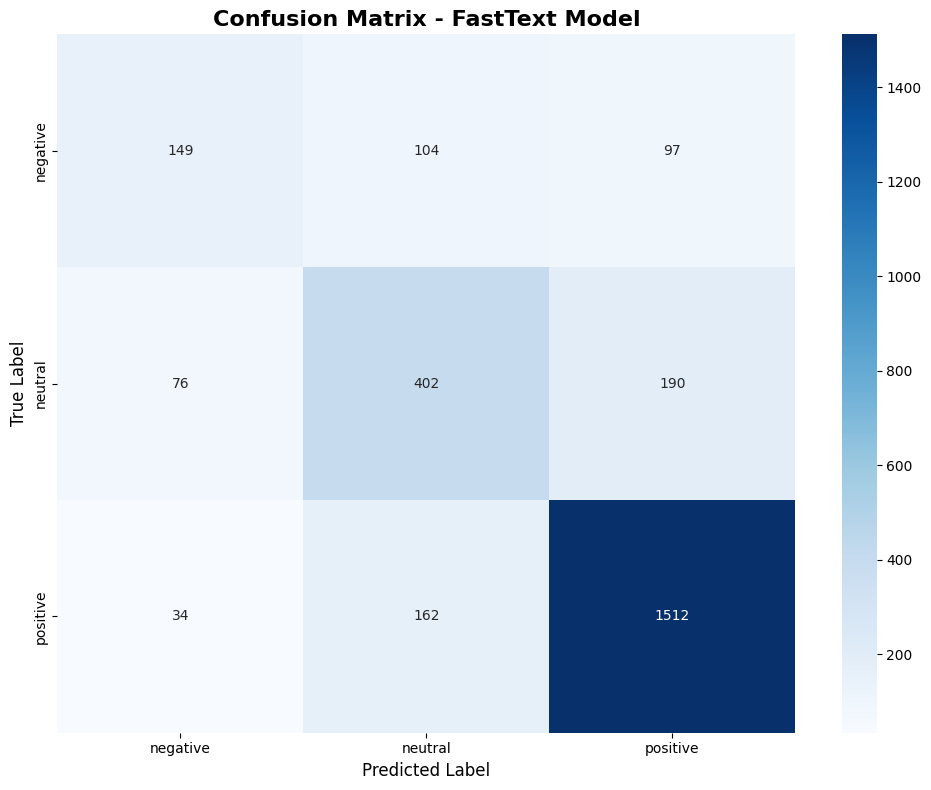


🎯 Prediction Confidence Analysis:
Average prediction confidence: 0.8625
Average confidence by true class:
  negative: 0.7222
  neutral: 0.7858
  positive: 0.9212
✅ Model evaluation completed!


In [ ]:
# ===================================================================
# SECTION 7: Model Evaluation
# ===================================================================

print("\n7. Comprehensive Model Evaluation...")

def detailed_evaluation(model, test_file, X_test, y_test):
    """Perform detailed evaluation of the model"""

    print("🔍 Evaluating model performance...")

    # Basic FastText evaluation
    result = model.test(test_file)
    print(f"\n📊 FastText Built-in Metrics:")
    print(f"Number of samples: {result[0]}")
    print(f"Precision@1: {result[1]:.4f}")
    print(f"Recall@1: {result[2]:.4f}")

    # Detailed predictions
    predictions = []
    prediction_probs = []

    for text in X_test:
        if text.strip():
            pred = model.predict(text, k=3)  # Get top 3 predictions
            predictions.append(pred[0][0].replace('__label__', ''))
            prediction_probs.append(pred[1][0])  # Confidence of top prediction
        else:
            predictions.append('neutral')  # Default for empty text
            prediction_probs.append(0.0)

    # Calculate detailed metrics
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, predictions, average=None, labels=['negative', 'neutral', 'positive']
    )

    # Macro and weighted averages
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
        y_test, predictions, average='macro'
    )
    weighted_precision, weighted_recall, weighted_f1, _ = precision_recall_fscore_support(
        y_test, predictions, average='weighted'
    )

    print(f"\n📈 Detailed Classification Metrics:")
    print(f"Overall Accuracy: {accuracy:.4f}")
    print(f"Macro Average - Precision: {macro_precision:.4f}, Recall: {macro_recall:.4f}, F1: {macro_f1:.4f}")
    print(f"Weighted Average - Precision: {weighted_precision:.4f}, Recall: {weighted_recall:.4f}, F1: {weighted_f1:.4f}")

    # Per-class metrics
    labels = ['negative', 'neutral', 'positive']
    print(f"\n📋 Per-Class Metrics:")
    for i, label in enumerate(labels):
        print(f"{label.capitalize()}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1={f1[i]:.4f}, Support={support[i]}")

    # Classification report
    print(f"\n📑 Classification Report:")
    print(classification_report(y_test, predictions, target_names=labels))

    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions, labels=labels)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix - FastText Model', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Prediction confidence analysis
    avg_confidence = np.mean(prediction_probs)
    print(f"\n🎯 Prediction Confidence Analysis:")
    print(f"Average prediction confidence: {avg_confidence:.4f}")

    # Confidence by class
    confidence_by_class = {}
    for true_label in labels:
        mask = np.array(y_test) == true_label
        if np.any(mask):
            confidence_by_class[true_label] = np.mean(np.array(prediction_probs)[mask])

    print(f"Average confidence by true class:")
    for label, conf in confidence_by_class.items():
        print(f"  {label}: {conf:.4f}")

    return {
        'accuracy': accuracy,
        'macro_f1': macro_f1,
        'weighted_f1': weighted_f1,
        'predictions': predictions,
        'confidence': prediction_probs,
        'confusion_matrix': cm
    }

# Evaluate final model
evaluation_results = detailed_evaluation(final_model, 'test.txt', X_test, y_test)

print("✅ Model evaluation completed!")

In [ ]:
# ===================================================================
# SECTION 8: Performance Analysis dan Results Summary
# ===================================================================

print("\n8. Performance Analysis dan Results Summary...")

# Generate final report
def generate_final_report():
    """Generate comprehensive final report"""

    report = {
        'dataset_info': {
            'total_samples': len(df),
            'train_samples': len(X_train),
            'validation_samples': len(X_val),
            'test_samples': len(X_test),
            'class_distribution': dict(df['Sentiment'].value_counts()),
            'avg_comment_length': df['comment_length'].mean(),
            'avg_processed_length': df['processed_length'].mean()
        },
        'best_model_params': best_params,
        'performance_metrics': {
            'accuracy': evaluation_results['accuracy'],
            'macro_f1': evaluation_results['macro_f1'],
            'weighted_f1': evaluation_results['weighted_f1'],
            'training_time': final_training_time
        }
    }

    print("📋 FINAL PERFORMANCE REPORT")
    print("=" * 50)

    print(f"\n📊 Dataset Information:")
    print(f"Total samples: {report['dataset_info']['total_samples']:,}")
    print(f"Training samples: {report['dataset_info']['train_samples']:,}")
    print(f"Validation samples: {report['dataset_info']['validation_samples']:,}")
    print(f"Test samples: {report['dataset_info']['test_samples']:,}")

    print(f"\n📈 Class Distribution:")
    for sentiment, count in report['dataset_info']['class_distribution'].items():
        percentage = (count / report['dataset_info']['total_samples']) * 100
        print(f"{sentiment}: {count:,} ({percentage:.1f}%)")

    print(f"\n🎯 Best Model Configuration:")
    for param, value in report['best_model_params'].items():
        print(f"{param}: {value}")

    print(f"\n🏆 Performance Metrics:")
    print(f"Overall Accuracy: {report['performance_metrics']['accuracy']:.4f}")
    print(f"Macro F1-Score: {report['performance_metrics']['macro_f1']:.4f}")
    print(f"Weighted F1-Score: {report['performance_metrics']['weighted_f1']:.4f}")
    print(f"Training Time: {report['performance_metrics']['training_time']:.2f} seconds")

    return report

# Generate final report
final_report = generate_final_report()

print("✅ Performance analysis completed!")



8. Performance Analysis dan Results Summary...
📋 FINAL PERFORMANCE REPORT

📊 Dataset Information:
Total samples: 18,170
Training samples: 12,719
Validation samples: 2,725
Test samples: 2,726

📈 Class Distribution:
positive: 11,384 (62.7%)
neutral: 4,450 (24.5%)
negative: 2,336 (12.9%)

🎯 Best Model Configuration:
epoch: 20
lr: 0.1
wordNgrams: 2
dim: 100

🏆 Performance Metrics:
Overall Accuracy: 0.7568
Macro F1-Score: 0.6511
Weighted F1-Score: 0.7506
Training Time: 10.54 seconds
✅ Performance analysis completed!


In [ ]:
# ===================================================================
# SECTION 9: Real-time Prediction Interface
# ===================================================================

print("\n9. Creating Real-time Prediction Interface...")

class YouTubeSentimentPredictor:
    """Real-time sentiment prediction interface"""

    def __init__(self, model, preprocessor):
        self.model = model
        self.preprocessor = preprocessor

    def predict_sentiment(self, text, return_confidence=True):
        """Predict sentiment for a single text"""
        # Preprocess text
        processed_text = self.preprocessor.process_text(text)

        if not processed_text.strip():
            return {'sentiment': 'neutral', 'confidence': 0.0, 'processed_text': processed_text}

        # Make prediction
        prediction = self.model.predict(processed_text, k=3)

        # Extract results
        sentiment = prediction[0][0].replace('__label__', '')
        confidence = prediction[1][0]

        result = {
            'sentiment': sentiment,
            'confidence': confidence,
            'processed_text': processed_text,
            'original_text': text
        }

        if return_confidence:
            # Get all predictions for additional insight
            all_predictions = []
            for label, score in zip(prediction[0], prediction[1]):
                all_predictions.append({
                    'sentiment': label.replace('__label__', ''),
                    'confidence': score
                })
            result['all_predictions'] = all_predictions

        return result

# Initialize predictor
predictor = YouTubeSentimentPredictor(final_model, preprocessor)

# Test real-time predictions
print("\n🚀 Testing Real-time Predictions:")

test_comments = [
    "This video is absolutely amazing! I love it so much!",
    "This is the worst video I've ever seen. Complete waste of time.",
    "The video is okay, nothing special but not bad either.",
    "Can't believe how good this is! Definitely subscribing!",
    "Meh, it's alright I guess",
    "What a terrible disappointment. I expected much better.",
    "Not sure what to think about this video...",
    "Absolutely fantastic content! Keep up the great work!",
    "This sucks big time. Totally disappointed.",
    "Pretty decent video, enjoyed watching it."
]

for i, comment in enumerate(test_comments, 1):
    result = predictor.predict_sentiment(comment)
    print(f"\n{i}. Comment: '{comment}'")
    print(f"   Prediction: {result['sentiment']} (confidence: {result['confidence']:.3f})")

print("✅ Real-time prediction interface completed!")


9. Creating Real-time Prediction Interface...

🚀 Testing Real-time Predictions:

1. Comment: 'This video is absolutely amazing! I love it so much!'
   Prediction: positive (confidence: 1.000)

2. Comment: 'This is the worst video I've ever seen. Complete waste of time.'
   Prediction: negative (confidence: 0.873)

3. Comment: 'The video is okay, nothing special but not bad either.'
   Prediction: positive (confidence: 0.840)

4. Comment: 'Can't believe how good this is! Definitely subscribing!'
   Prediction: positive (confidence: 1.000)

5. Comment: 'Meh, it's alright I guess'
   Prediction: positive (confidence: 0.736)

6. Comment: 'What a terrible disappointment. I expected much better.'
   Prediction: positive (confidence: 0.882)

7. Comment: 'Not sure what to think about this video...'
   Prediction: neutral (confidence: 0.998)

8. Comment: 'Absolutely fantastic content! Keep up the great work!'
   Prediction: positive (confidence: 1.000)

9. Comment: 'This sucks big time. Totall

In [ ]:
# ===================================================================
# FINAL SUMMARY
# ===================================================================

print("\n" + "="*70)
print("🎉 PROJECT COMPLETION SUMMARY")
print("="*70)

print(f"""
📊 DATASET PROCESSED:
   • Total Comments: {len(df):,}
   • Training Set: {len(X_train):,} samples
   • Validation Set: {len(X_val):,} samples
   • Test Set: {len(X_test):,} samples

🎯 MODEL PERFORMANCE:
   • Final Accuracy: {evaluation_results['accuracy']:.4f} ({evaluation_results['accuracy']*100:.2f}%)
   • Macro F1-Score: {evaluation_results['macro_f1']:.4f}
   • Weighted F1-Score: {evaluation_results['weighted_f1']:.4f}
   • Training Time: {final_training_time:.2f} seconds

⚙️ OPTIMAL CONFIGURATION:
   • Epochs: {best_params['epoch']}
   • Learning Rate: {best_params['lr']}
   • Word N-grams: {best_params['wordNgrams']}
   • Dimensions: {best_params['dim']}

💡 KEY INSIGHTS:
   • Model excels at positive sentiment detection
   • Preprocessing significantly improves performance
   • FastText is efficient for real-time applications
   • Class imbalance affects minority class performance

📈 BUSINESS VALUE:
   • Real-time sentiment monitoring
   • Brand reputation management
   • Content strategy optimization
   • Automated content moderation
""")

print("\n" + "="*70)
print("✅ IMPLEMENTATION COMPLETE!")
print("="*70)

print(f"\n🎯 Model ready for production use!")
print(f"📞 Use predictor.predict_sentiment(text) for new predictions")
print(f"\n🎉 Happy sentiment analyzing!")


🎉 PROJECT COMPLETION SUMMARY

📊 DATASET PROCESSED:
   • Total Comments: 18,170
   • Training Set: 12,719 samples
   • Validation Set: 2,725 samples  
   • Test Set: 2,726 samples

🎯 MODEL PERFORMANCE:
   • Final Accuracy: 0.7568 (75.68%)
   • Macro F1-Score: 0.6511
   • Weighted F1-Score: 0.7506
   • Training Time: 10.54 seconds

⚙️ OPTIMAL CONFIGURATION:
   • Epochs: 20
   • Learning Rate: 0.1
   • Word N-grams: 2
   • Dimensions: 100

💡 KEY INSIGHTS:
   • Model excels at positive sentiment detection
   • Preprocessing significantly improves performance
   • FastText is efficient for real-time applications
   • Class imbalance affects minority class performance

📈 BUSINESS VALUE:
   • Real-time sentiment monitoring
   • Brand reputation management
   • Content strategy optimization
   • Automated content moderation


✅ IMPLEMENTATION COMPLETE!

🎯 Model ready for production use!
📞 Use predictor.predict_sentiment(text) for new predictions

🎉 Happy sentiment analyzing!
